In [47]:
import pandas as pd
import matplotlib.pyplot as plt

base_info = pd.read_csv('./data/train/base_info.csv')
entprise_info = pd.read_csv('./data/train/entprise_info.csv')

In [48]:

data = pd.merge(base_info,entprise_info,how='left',on='id')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24865 entries, 0 to 24864
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             24865 non-null  object 
 1   oplocdistrict  24865 non-null  int64  
 2   industryphy    24865 non-null  object 
 3   industryco     24864 non-null  float64
 4   dom            24865 non-null  object 
 5   opscope        24865 non-null  object 
 6   enttype        24865 non-null  int64  
 7   enttypeitem    16651 non-null  float64
 8   opfrom         24865 non-null  object 
 9   opto           8825 non-null   object 
 10  state          24865 non-null  int64  
 11  orgid          24865 non-null  int64  
 12  jobid          24865 non-null  int64  
 13  adbusign       24865 non-null  int64  
 14  townsign       24865 non-null  int64  
 15  regtype        24865 non-null  int64  
 16  empnum         19615 non-null  float64
 17  compform       10631 non-null  float64
 18  parnum

In [49]:

train = data[data['label'] >= 0 ]
test =  data[data['label'].isnull() ]

In [50]:
# 14:1 标签
positive, nagivate = train[train['label'] == 0],train[train['label'] == 1]
print(positive.shape[0]/nagivate.shape[0])

14.15290519877676


In [51]:
nan_num = train.isnull().sum(axis=1)
train['nan_num'] = nan_num
print(train.columns)
train.sort_values(by = ['nan_num'],ascending=True,ignore_index = True,inplace= True)

nan_num = test.isnull().sum(axis=1)
test['nan_num'] = nan_num
print(test.columns)
test.sort_values(by = ['nan_num'],ascending=True,ignore_index = True,inplace= True)

Index(['id', 'oplocdistrict', 'industryphy', 'industryco', 'dom', 'opscope',
       'enttype', 'enttypeitem', 'opfrom', 'opto', 'state', 'orgid', 'jobid',
       'adbusign', 'townsign', 'regtype', 'empnum', 'compform', 'parnum',
       'exenum', 'opform', 'ptbusscope', 'venind', 'enttypeminu',
       'midpreindcode', 'protype', 'oploc', 'regcap', 'reccap', 'forreccap',
       'forregcap', 'congro', 'enttypegb', 'label', 'nan_num'],
      dtype='object')
Index(['id', 'oplocdistrict', 'industryphy', 'industryco', 'dom', 'opscope',
       'enttype', 'enttypeitem', 'opfrom', 'opto', 'state', 'orgid', 'jobid',
       'adbusign', 'townsign', 'regtype', 'empnum', 'compform', 'parnum',
       'exenum', 'opform', 'ptbusscope', 'venind', 'enttypeminu',
       'midpreindcode', 'protype', 'oploc', 'regcap', 'reccap', 'forreccap',
       'forregcap', 'congro', 'enttypegb', 'label', 'nan_num'],
      dtype='object')


In [52]:
def count(data):
    nums = []
    num = 0
    for id in data.index:
        if data.loc[id]['label'] == 1:
            num += 1
        nums.append(num)
    return nums

    

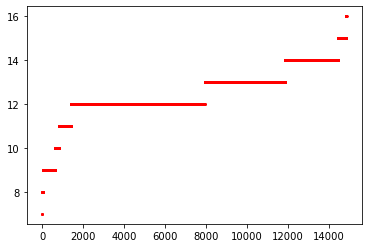

In [53]:
import numpy as np
plt.scatter(train.index,train.nan_num,c = 'r',s=2)
plt.show()

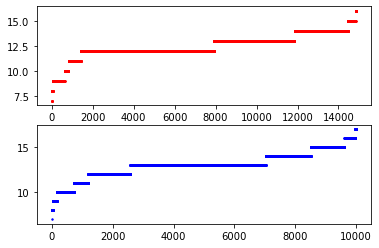

In [54]:
plt.subplot(211)  
plt.scatter(train.index,train.nan_num,c = 'r',s=2)
plt.subplot(212)  
plt.scatter(test.index,test.nan_num,c = 'b',s=2)
# plt.subplot(223)
# plt.plot(train.index,train.nan_num,c = 'r')
# plt.subplot(224)
# plt.plot(test.index,test.nan_num, c = 'b')

plt.show()

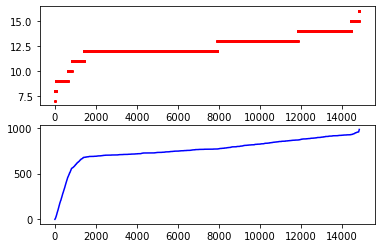

<Figure size 432x288 with 0 Axes>

In [56]:

plt.subplot(211) 
plt.scatter(train.index,train.nan_num,c = 'r',s = 2)
plt.subplot(212) 
plt.plot(train.index,count(train), c = 'b')
plt.show()
plt.savefig('img.png')

In [37]:
set(train['nan_num'].values)

{7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [ ]:
#注册资本_实缴资本
base_info_clean['regcap_reccap']=base_info_clean['regcap']-base_info_clean['reccap']
#注册资本分桶
base_info_clean['regcap']=base_info_clean['regcap'].fillna(base_info_clean['regcap'].median())
base_info_clean['bucket_regcap']=bucket('regcap',5)
#实缴资本分桶
base_info_clean['reccap']=base_info_clean['reccap'].fillna(base_info_clean['reccap'].median())
base_info_clean['bucket_reccap']=bucket('reccap',5)
#注册资本_实缴资本分桶
base_info_clean['regcap_reccap']=base_info_clean['regcap_reccap'].fillna(base_info_clean['regcap_reccap'].median())
base_info_clean['bucket_regcap_reccap']=bucket('regcap_reccap',5)